# Stop-Loss 주식채권현금 분산투자전략

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

# Finance Library import
from Library import FinanceLibrary as fl

##### File 읽어오기

In [2]:
df_kodex = pd.read_csv("..\\Data\\KODEX200_daily_data.csv", encoding="utf-8")
df_bond10 = pd.read_csv("..\\Data\\KOSEF국고채10년_daily_data.csv", encoding="utf-8")
df_bond3 = pd.read_csv("..\\Data\\KODEX국고채3년_Daily_2010data.csv", encoding="utf-8")

In [3]:
# 해도 되고 안해도 되는 정렬
df_kodex = df_kodex.sort_values("Date")
df_bond10 = df_bond10.sort_values("Date")
df_bond3 = df_bond3.sort_values("Date")

##### KODEX 주간, 월간데이터 만들기

In [4]:
df_kodex["Date"] = pd.to_datetime(df_kodex["Date"])  # Converting date to pandas datetime format
df_kodex["Year"] = df_kodex["Date"].dt.year  # Getting year number
df_kodex["Month"] = df_kodex["Date"].dt.month  # Getting month number
df_kodex["Week_Number"] = df_kodex["Date"].dt.week  # Getting week number
df_kodex["WeekDay"] = df_kodex["Date"].dt.weekday
# 주간, 월간 Data만들기
df_kodex_week = df_kodex.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_kodex_month = df_kodex.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국채10년 주간,월간데이터 만들기

In [5]:
df_bond10["Date"] = pd.to_datetime(df_bond10["Date"])  # Converting date to pandas datetime format
df_bond10["Year"] = df_bond10["Date"].dt.year  # Getting year number
df_bond10["Month"] = df_bond10["Date"].dt.month  # Getting month number
df_bond10["Week_Number"] = df_bond10["Date"].dt.week  # Getting week number
df_bond10["WeekDay"] = df_bond10["Date"].dt.weekday
# 주간, 월간 Data만들기
df_bond10_week = df_bond10.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_bond10_month = df_bond10.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국채3년 주간,월간데이터 만들기

In [6]:
df_bond3["Date"] = pd.to_datetime(df_bond3["Date"])  # Converting date to pandas datetime format
df_bond3["Year"] = df_bond3["Date"].dt.year  # Getting year number
df_bond3["Month"] = df_bond3["Date"].dt.month  # Getting month number
df_bond3["Week_Number"] = df_bond3["Date"].dt.week  # Getting week number
df_bond3["WeekDay"] = df_bond3["Date"].dt.weekday
# 주간, 월간 Data만들기
df_bond3_week = df_bond3.groupby(["Year","Week_Number"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})
df_bond3_month = df_bond3.groupby(["Year","Month"]).agg({"Open":"first","High":"max","Low":"min","Close":"last","Volume":"sum","Date":"last"})

##### 국고채10년 데이터 시작주인 2011,42주후 데이터 만들기

In [7]:
# 국고채10년 데이터 시작주인 2011,42주후 데이터 만들기
kodex_week = df_kodex_week.loc[(2011,42):]
bond10_week = df_bond10_week.loc[(2011,42):]
bond3_week = df_bond3_week.loc[(2011,42):]
# index Date로 재지정하기
kodex_week = kodex_week.reset_index()
kodex_week.index = pd.to_datetime(kodex_week["Date"])
kodex_week = kodex_week.sort_index()
bond10_week = bond10_week.reset_index()
bond10_week.index = pd.to_datetime(bond10_week["Date"])
bond10_week = bond10_week.sort_index()
bond3_week = bond3_week.reset_index()
bond3_week.index = pd.to_datetime(bond3_week["Date"])
bond3_week = bond3_week.sort_index()

##### re-scale

In [8]:
KODEX = kodex_week["Close"]/kodex_week["Close"][0]
BOND10 = bond10_week["Close"]/bond10_week["Close"][0]
BOND3 = bond3_week["Close"]/bond3_week["Close"][0]

##### Low, Close 등락율 구하기

In [9]:
# Low 데이타는 전일 Close와 비교하여 등락율을 구함
kodex_week_low = np.round((kodex_week["Low"].shift(-1)/kodex_week["Close"] - 1) * 100, 2)
bond10_week_low = np.round((bond10_week["Low"].shift(-1)/bond10_week["Close"] - 1) * 100, 2)
bond3_week_low = np.round((bond3_week["Low"].shift(-1)/bond3_week["Close"] - 1) * 100, 2)
# Close 데이타는 전일 Close와 비교하여 등락율을 구함
kodex_week_close = np.round((kodex_week["Close"].shift(-1)/kodex_week["Close"] - 1) * 100, 2)
bond10_week_close = np.round((bond10_week["Close"].shift(-1)/bond10_week["Close"] - 1) * 100, 2)
bond3_week_close = np.round((bond3_week["Close"].shift(-1)/bond3_week["Close"] - 1) * 100, 2)
# Low와 Close 데이타 합치기
kodex = pd.concat([kodex_week_low.rename("Low"),kodex_week_close.rename("Close")],axis=1)
bond10 = pd.concat([bond10_week_low.rename("Low"),bond10_week_close.rename("Close")],axis=1)
bond3 = pd.concat([bond3_week_low.rename("Low"),bond3_week_close.rename("Close")],axis=1)

##### Low 값을 기준값과 비교하여 업데이트하기

# VAL

In [10]:
val = -3  # 기준값(판단값)
for i in range(len(kodex)):
    if kodex["Low"][i] < val:
        kodex["Close"][i] = val
        
for i in range(len(bond10)):
    if bond10["Low"][i] < val:
        bond10["Close"][i] = val

for i in range(len(bond3)):
    if bond3["Low"][i] < val:
        bond3["Close"][i] = val

#### 모멘텀 수익률

In [11]:
# Stop Loss 사용
kodex_momentum_return = pd.Series(kodex["Close"]/100 + 1, index=kodex_week.index)
bond10_momentum_return = pd.Series(bond10["Close"]/100 + 1, index=bond10_week.index)
bond3_momentum_return = pd.Series(bond3["Close"]/100 + 1, index=bond3_week.index)
# Stop Loss 미사용
#kodex_momentum_return = fl.TomorrowDailyReturn(KODEX)
#bond10_momentum_return = fl.TomorrowDailyReturn(BOND10)
#bond3_momentum_return = fl.TomorrowDailyReturn(BOND3)

##### 평균모멘텀 스코어 구하기

In [12]:
# KODEX 평균모멘텀 스코어, 기간설정
kodex_average_score = pd.Series(fl.AverageMomentum(KODEX,24), index=KODEX.index, name="KODEX")
# BOND 평균모멘텀 스코어, 기간설정
bond10_average_score = pd.Series(fl.AverageMomentum(BOND10,24), index=BOND10.index, name="BOND10")

In [13]:
tri_ratio = pd.concat([kodex_average_score,bond10_average_score],axis=1).dropna()

In [14]:
# 투자 비중 = KODEX / ( KODEX 12개월 평균 모멘텀 + BOND10 12개월 평균 모멘텀 + 1(3개월 펀드=현금))
# 현금에 해당하는 3년국채는 "1" 비율만큼 항상 투입된다
kodex_ratio = tri_ratio["KODEX"]/ (tri_ratio["KODEX"] + tri_ratio["BOND10"] + 1)
bond10_ratio = tri_ratio["BOND10"]/ (tri_ratio["KODEX"] + tri_ratio["BOND10"] + 1)
cash_ratio = 1 - (kodex_ratio + bond10_ratio)
#모멘텀비중 투자
모멘텀배분수익 = (kodex_momentum_return * kodex_ratio) + (bond10_momentum_return * bond10_ratio)\
            + (bond3_momentum_return * cash_ratio)
모멘텀배분TRI = np.cumprod(모멘텀배분수익)  # 누적 수익률
# 동일비중 투자
균등배분수익 = kodex_momentum_return * 0.3333 + bond10_momentum_return * 0.3333 + bond3_momentum_return * 0.3334
균등배분TRI = np.cumprod(균등배분수익)  # 누적 수익률

##### 최빈값구하기

In [15]:
returns = KODEX.pct_change() * 100  # 수익률 %구하기
returns = np.round(returns,2)  # %단위로 환산, 자리수 정리

In [16]:
from collections import Counter
cnt = Counter(returns)
order = cnt.most_common()  # 내림차순
cnt.most_common(5)  # 빈도 상위5개

[(1.13, 5), (0.37, 5), (-0.28, 3), (-0.13, 3), (0.42, 3)]

##### Histogram 

In [17]:
cnt = sorted(cnt, key=cnt.get,reverse=True)  # counter객체에서 value로 list객체 만들기
data = [x for x in cnt if ~np.isnan(x)]  # list에서 nan 제거

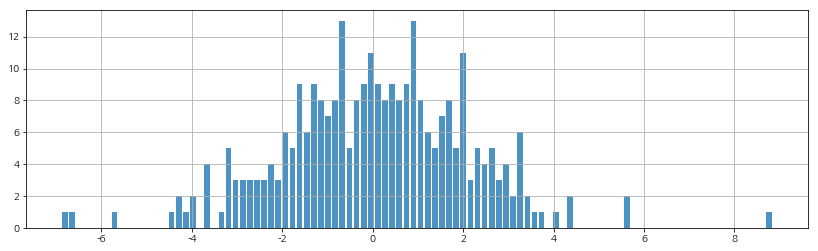

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

plt.figure(figsize=(14,4))
plt.hist(data,rwidth=0.8, bins=100, alpha=0.8)
plt.grid(True)

In [19]:
print ("전체 갯수:",len(data))
each = [x for x in data if x < -3]
print ("조건 갯수:",len(each))

전체 갯수: 293
조건 갯수: 22


##### 포트폴리오 성과 비교하기

In [20]:
kodex = fl.Portfolio(KODEX,"KODEX")
bond10 = fl.Portfolio(BOND10,"BOND10")
cash = fl.Portfolio(BOND3,"CASH")
tri = fl.Portfolio(모멘텀배분TRI,"모멘텀배분TRI")
균등tri = fl.Portfolio(균등배분TRI,"균등배분TRI")

result = pd.concat([kodex,bond10,cash,tri,균등tri],axis=1)
pd.DataFrame(result).T

,Initial Balnce,Final Balance,CAGR,Std,Max.Drawdown,Sharpe Ratio
KODEX,1.000000,1.306259,3.0130,0.1415,-21.0914,0.0460
BOND10,1.000000,1.391024,3.7352,0.1183,-8.2454,0.1626
CASH,1.000000,1.232308,2.3481,0.0672,-1.5830,0.3164
모멘텀배분TRI,0.998300,1.177071,1.8472,0.0585,-4.0076,0.0853
균등배분TRI,1.017465,1.146663,1.3371,0.0534,-7.0522,0.0493


### 그래프

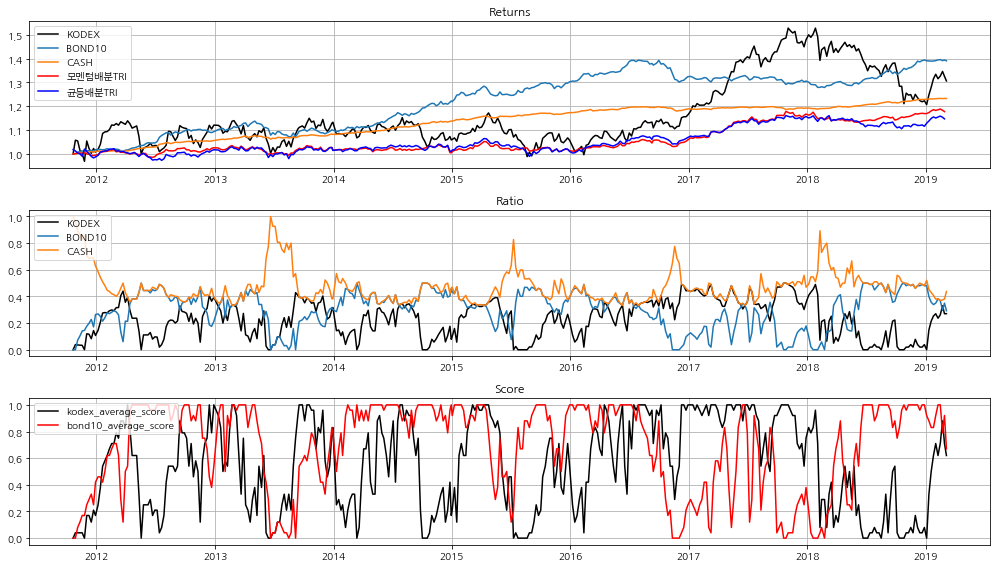

In [21]:
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_title("Returns")
ax1.plot(KODEX,color="Black",label="KODEX")
ax1.plot(BOND10,label="BOND10")
ax1.plot(BOND3,label="CASH")
ax1.plot(모멘텀배분TRI,color="Red",label="모멘텀배분TRI")
ax1.plot(균등배분TRI,color="Blue",label="균등배분TRI")
ax1.grid()
ax1.legend(loc=2)

ax2.set_title("Ratio")
ax2.plot(kodex_ratio,color="Black", label="KODEX")
ax2.plot(bond10_ratio, label="BOND10")
ax2.plot(cash_ratio, label="CASH")
ax2.grid()
ax2.legend(loc=2)

ax3.set_title("Score")
ax3.plot(kodex_average_score, color="Black", label="kodex_average_score")
ax3.plot(bond10_average_score, color="Red", label="bond10_average_score")
ax3.grid()
ax3.legend(loc=2)

# 차트끼리 충돌을 방지합니다.
plt.tight_layout()
plt.show()